## Combined Report Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('jira_issue.csv')
df2 = pd.read_csv('emp_performance.csv')

In [3]:
df1.sample(5)

id                  created  \
643   510584  2006-02-09 12:42:30.341   
1572  511534  2009-11-11 14:43:44.077   
825   510793  2006-07-20 15:25:04.996   
1487  511398      2011-07-22 00:55:25   
2001  511945      2010-10-20 18:55:01   

                                            description        key priority  \
643   If you try to include a Jboss web service arch...    MEAR-18    Major   
1572  Using {{unpack}} and {{unpack-dependencies}} w...   MDEP-241    Major   
825   Here is a patch for proxy support in the maven...   MDOCCK-5    Major   
1487  This was inspired by a [question by Gert-Jan o...  MODE-1226    Major   
2001  I have set up several repositories within the ...   MODE-971    Major   

     project                        project_name repositoryname resolution  \
643     MEAR                    Maven Ear Plugin       CODEHAUS      Fixed   
1572    MDEP             Maven Dependency Plugin       CODEHAUS        NaN   
825   MDOCCK  Maven Documentation Checker Plugin       CODEHAUS      Fixed   
1487    MODE                           ModeShape          JBOSS        NaN   
2001    MODE                           ModeShape          JBOSS   Rejected   

                     resolved    status  \
643    2006-02-12 00:28:28.95    Closed   
1572                      NaN      Open   
825   2006-08-08 15:45:13.547    Closed   
1487                      NaN      Open   
2001      2010-10-20 23:06:18  Resolved   

                                                  title             type  \
643   The EAR plugin will not properly handle WSR (J...             Wish   
1572  Dependency-Unpack and Unpack do not preserve e...              Bug   
825            [Patch] maven-docck-plugin proxy support      Improvement   
1487  Allow nodes (and subgraphs) to be detached fro...  Feature Request   
2001  Sequence process does not work correctly for V...              Bug   

                      updated  votes  watchers  assignee_id  reporter_id  
643   2006-03-09 12:49:59.997      0         0      77288.0        83239  
1572  2012-10-28 18:07:13.225      3         2          NaN        78827  
825   2006-11-04 19:16:44.958      0         1      28417.0        75592  
1487      2013-10-24 00:56:09      2         4        569.0          569  
2001      2011-02-08 23:31:46      0         0        569.0        76202

### Rename the column name

In [4]:
df1.rename(columns = {'assignee_id':'employee_id'}, inplace = True)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2499 non-null   int64  
 1   created         2499 non-null   object 
 2   description     2448 non-null   object 
 3   key             2499 non-null   object 
 4   priority        2486 non-null   object 
 5   project         2499 non-null   object 
 6   project_name    2499 non-null   object 
 7   repositoryname  2499 non-null   object 
 8   resolution      2114 non-null   object 
 9   resolved        2114 non-null   object 
 10  status          2499 non-null   object 
 11  title           2499 non-null   object 
 12  type            2499 non-null   object 
 13  updated         2499 non-null   object 
 14  votes           2499 non-null   int64  
 15  watchers        2499 non-null   int64  
 16  employee_id     1911 non-null   float64
 17  reporter_id     2499 non-null   i

In [6]:
df2.sample(5)

employee_id        lead_name       emp_name         department     region  \
3          4615     Craig Rayner  Declan Dundas  Sales & Marketing  region_23   
1           553         Sam Wood  Dominic Scott         Operations  region_22   
38        40815    Larry Lambert   Will Poynton  Sales & Marketing   region_1   
79        47705  Ebony Northcott    Alexis Code  Sales & Marketing  region_22   
20        73762   Libby Thompson   Corey Browne        Procurement  region_14   

           education gender  no_of_trainings   age  previous_year_rating  \
3         Bachelor's      m                2  39.0                   1.0   
1         Bachelor's      m                1  30.0                   5.0   
38  Master's & above      m                1  42.0                   5.0   
79        Bachelor's      m                1  30.0                   3.0   
20        Bachelor's      m                1  35.0                   3.0   

    current_rating  performance_score                        comment  
3              NaN               65.0   Excellent work. Keep it up!!  
1              4.0               67.0  Need to improve your skillset  
38             3.0               87.0  Need to improve your skillset  
79             4.0               44.0   Excellent work. Keep it up!!  
20             4.0               56.0   Excellent work. Keep it up!!

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           81 non-null     int64  
 1   lead_name             81 non-null     object 
 2   emp_name              81 non-null     object 
 3   department            81 non-null     object 
 4   region                81 non-null     object 
 5   education             81 non-null     object 
 6   gender                81 non-null     object 
 7   no_of_trainings       81 non-null     int64  
 8   age                   77 non-null     float64
 9   previous_year_rating  77 non-null     float64
 10  current_rating        77 non-null     float64
 11  performance_score     77 non-null     float64
 12  comment               81 non-null     object 
dtypes: float64(4), int64(2), object(7)
memory usage: 8.4+ KB


### Merge the dataframe with employee_id column

In [8]:
data = pd.merge(df1,df2,on='employee_id', how ='inner')

In [9]:
data

id                  created  \
0     509981  2006-09-08 17:41:16.982   
1     510069  2006-01-05 00:16:21.972   
2     518265  2006-05-01 03:53:43.905   
3     510185  2005-09-03 04:07:36.008   
4     510558  2006-10-17 01:05:50.177   
...      ...                      ...   
1906  512301      2010-07-14 09:29:26   
1907  512369  2006-01-10 08:07:47.999   
1908  512376  2005-09-23 09:13:26.302   
1909  512390      2004-08-15 12:31:51   
1910  514140      2011-04-11 15:29:49   

                                            description              key  \
0     A way to generate ebj/web projects with XDocle...     MECLIPSE-157   
1     If you download 2 versions of the same artifac...     MECLIPSE-119   
2                  New release of the cas-extend client  MAVENUPLOAD-870   
3     Currently the EclipseWriter uses the POM artif...      MECLIPSE-44   
4     Many of the Apache-hosted plugins depend on PO...          MEAR-45   
...                                                 ...              ...   
1906  The DDL sequencer produces a unique key with n...         MODE-815   
1907  Sometimes you might want to see deprecated api...     MCOMPILER-25   
1908                                                NaN     MCOMPILER-18   
1909  The java compiler currently silently ignores a...      MCOMPILER-4   
1910  An application timeout mark a worker in ERROR,...   MODCLUSTER-226   

     priority      project           project_name repositoryname resolution  \
0       Major     MECLIPSE   Maven Eclipse Plugin       CODEHAUS  Duplicate   
1       Major     MECLIPSE   Maven Eclipse Plugin       CODEHAUS  Duplicate   
2         NaN  MAVENUPLOAD  Maven Upload Requests       CODEHAUS      Fixed   
3       Minor     MECLIPSE   Maven Eclipse Plugin       CODEHAUS  Duplicate   
4       Major         MEAR       Maven Ear Plugin       CODEHAUS  Won't Fix   
...       ...          ...                    ...            ...        ...   
1906  Blocker         MODE              ModeShape          JBOSS       Done   
1907    Major    MCOMPILER  Maven Compiler Plugin       CODEHAUS      Fixed   
1908    Major    MCOMPILER  Maven Compiler Plugin       CODEHAUS      Fixed   
1909    Minor    MCOMPILER  Maven Compiler Plugin       CODEHAUS      Fixed   
1910    Major   MODCLUSTER            mod_cluster          JBOSS        NaN   

                     resolved  ...         department     region  \
0     2007-03-14 06:36:43.842  ...  Sales & Marketing   region_7   
1      2007-03-26 21:08:48.66  ...  Sales & Marketing   region_7   
2      2006-05-03 13:37:09.18  ...  Sales & Marketing   region_7   
3     2007-03-14 07:29:56.688  ...  Sales & Marketing   region_7   
4     2006-10-17 03:02:03.479  ...  Sales & Marketing   region_7   
...                       ...  ...                ...        ...   
1906      2010-08-21 08:13:03  ...  Sales & Marketing  region_30   
1907  2006-01-13 08:07:52.958  ...          Analytics   region_2   
1908  2005-10-24 07:09:41.338  ...  Sales & Marketing  region_22   
1909  2005-10-15 22:44:03.501  ...  Sales & Marketing  region_22   
1910                      NaN  ...         Technology   region_2   

             education gender  no_of_trainings   age  previous_year_rating  \
0     Master's & above      f                1  35.0                   5.0   
1     Master's & above      f                1  35.0                   5.0   
2     Master's & above      f                1  35.0                   5.0   
3     Master's & above      f                1  35.0                   5.0   
4     Master's & above      f                1  35.0                   5.0   
...                ...    ...              ...   ...                   ...   
1906        Bachelor's      m                1  35.0                   4.0   
1907        Bachelor's      m                1  25.0                   3.0   
1908        Bachelor's      m                1  30.0                   3.0   
1909        Bachelor's      m                1  30.0      

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1911 non-null   int64  
 1   created               1911 non-null   object 
 2   description           1864 non-null   object 
 3   key                   1911 non-null   object 
 4   priority              1899 non-null   object 
 5   project               1911 non-null   object 
 6   project_name          1911 non-null   object 
 7   repositoryname        1911 non-null   object 
 8   resolution            1854 non-null   object 
 9   resolved              1854 non-null   object 
 10  status                1911 non-null   object 
 11  title                 1911 non-null   object 
 12  type                  1911 non-null   object 
 13  updated               1911 non-null   object 
 14  votes                 1911 non-null   int64  
 15  watchers             

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [12]:
data.head(5)

id                  created  \
0  509981  2006-09-08 17:41:16.982   
1  510069  2006-01-05 00:16:21.972   
2  518265  2006-05-01 03:53:43.905   
3  510185  2005-09-03 04:07:36.008   
4  510558  2006-10-17 01:05:50.177   

                                         description              key  \
0  A way to generate ebj/web projects with XDocle...     MECLIPSE-157   
1  If you download 2 versions of the same artifac...     MECLIPSE-119   
2               New release of the cas-extend client  MAVENUPLOAD-870   
3  Currently the EclipseWriter uses the POM artif...      MECLIPSE-44   
4  Many of the Apache-hosted plugins depend on PO...          MEAR-45   

  priority      project           project_name repositoryname resolution  \
0    Major     MECLIPSE   Maven Eclipse Plugin       CODEHAUS  Duplicate   
1    Major     MECLIPSE   Maven Eclipse Plugin       CODEHAUS  Duplicate   
2      NaN  MAVENUPLOAD  Maven Upload Requests       CODEHAUS      Fixed   
3    Minor     MECLIPSE   Maven Eclipse Plugin       CODEHAUS  Duplicate   
4    Major         MEAR       Maven Ear Plugin       CODEHAUS  Won't Fix   

                  resolved  status  \
0  2007-03-14 06:36:43.842  Closed   
1   2007-03-26 21:08:48.66  Closed   
2   2006-05-03 13:37:09.18  Closed   
3  2007-03-14 07:29:56.688  Closed   
4  2006-10-17 03:02:03.479  Closed   

                                               title         type  \
0  xdoclet facet for xdoclet-enabled ejb/web proj...  Improvement   
1     Allow custom project name for eclipse projects  New Feature   
2                 cas-extend-client-java version 2.2         Task   
3  Allow eclipse plugin .project name to be custo...  Improvement   
4  Building Apache-hosted plugins with empty repo...          Bug   

                   updated  votes  watchers  employee_id  reporter_id  \
0  2007-03-14 06:36:43.836      0         1       9813.0        86730   
1  2007-07-07 11:40:01.539      6         6       9813.0        85167   
2  2006-05-03 13:37:09.159      0         0       9813.0        16962   
3  2007-03-14 07:29:56.682      5         5       9813.0          517   
4  2006-10-17 03:24:53.767      0         0       9813.0         5947   

        lead_name          emp_name         department    region  \
0  Tyson Jonathan  Charlie Horrocks  Sales & Marketing  region_7   
1  Tyson Jonathan  Charlie Horrocks  Sales & Marketing  region_7   
2  Tyson Jonathan  Charlie Horrocks  Sales & Marketing  region_7   
3  Tyson Jonathan  Charlie Horrocks  Sales & Marketing  region_7   
4  Tyson Jonathan  Charlie Horrocks  Sales & Marketing  region_7   

          education gender  no_of_trainings   age  previous_year_rating  \
0  Master's & above      f                1  35.0                   5.0   
1  Master's & above      f                1  35.0                   5.0   
2  Master's & above      f                1  35.0                   5.0   
3  Master's & above      f                1  35.0                   5.0   
4  Master's & above      f                1  35.0                   5.0   

   current_rating  performance_score                        comment  
0             3.0               56.0  Need to improve your skillset  
1             3.0               56.0  Need to improve your skillset  
2             3.0               56.0  Need to improve your skillset  
3             3.0               56.0  Need to improve your skillset  
4             3.0               56.0  Need to improve your skillset

In [13]:
data

id                  created  \
0     509981  2006-09-08 17:41:16.982   
1     510069  2006-01-05 00:16:21.972   
2     518265  2006-05-01 03:53:43.905   
3     510185  2005-09-03 04:07:36.008   
4     510558  2006-10-17 01:05:50.177   
5     519102  2005-06-25 12:25:09.831   
6     511142  2005-11-18 03:05:02.883   
7     515930  2008-08-04 18:01:24.212   
8     511344   2011-10-27 01:16:21.51   
9     511345  2011-10-27 01:10:19.227   
10    511420  2011-03-27 22:38:52.367   
11    511422  2011-03-07 16:28:40.986   
12    516037  2008-06-17 20:59:28.839   
13    511424  2011-03-02 21:25:24.139   
14    511429   2011-01-21 01:56:24.46   
15    511444  2010-09-13 23:09:52.761   
16    511503  2010-07-09 21:34:04.946   
17    516478  2007-12-20 06:18:43.497   
18    516555  2007-12-06 06:36:56.182   
19    516556  2007-12-06 04:55:06.325   
20    516746  2007-09-01 03:45:02.177   
21    516842  2007-07-20 21:55:13.887   
22    516925  2007-06-29 03:14:37.556   
23    512267  2008-08-07 02:20:59.723   
24    512298  2006-12-04 09:11:23.299   
25    512351  2006-10-24 14:57:29.523   
26    512352  2006-10-11 01:33:11.914   
27    512357  2006-07-13 18:15:48.708   
28    512366   2006-03-22 14:38:35.57   
29    512367  2006-02-11 19:25:12.693   
30    512368  2006-01-22 10:42:06.469   
31    512370    2006-01-05 00:55:40.3   
32    512371  2005-12-28 05:08:45.367   
33    512372  2005-12-21 05:00:24.187   
34    512389  2005-11-11 04:10:20.018   
35    512395  2005-12-01 20:16:28.849   
36    509942      2013-06-19 18:44:57   
37    509943      2013-06-17 22:11:16   
38    509944      2013-06-14 17:05:07   
39    509945      2013-06-12 22:33:11   
40    509946      2013-06-11 20:32:39   
41    510016      2013-05-22 23:43:24   
42    509947      2013-06-11 20:15:51   
43    509948      2013-06-11 15:43:07   
44    509949      2013-06-10 15:35:22   
45    510018      2013-05-21 03:13:43   
46    510007      2013-05-31 13:39:46   
47    510008      2013-05-29 23:54:53   
48    510009      2013-05-29 23:40:35   
49    510013      2013-05-26 00:48:08   
50    510014      2013-05-23 22:24:56   
51    510015      2013-05-22 23:59:35   
52    510020      2013-05-17 16:05:25   
53    510023      2013-05-10 23:04:48   
54    510024      2013-05-10 21:12:59   
55    510025      2013-05-09 18:01:04   
56    510026      2013-05-09 17:48:32   
57    510047      2013-04-25 14:50:37   
58    510029      2013-05-08 18:11:39   
59    510033      2013-05-07 21:11:44   
60    510035      2013-05-07 17:04:29   
61    510037      2013-05-06 22:09:47   
62    510039      2013-05-02 23:14:14   
63    510046      2013-04-25 15:54:12   
64    510042      2013-04-29 23:19:02   
65    510043      2013-04-29 14:56:23   
66    510045      2013-04-25 19:04:49   
67    510100      2013-04-23 23:05:04   
68    510102      2013-04-22 18:39:35   
69    510106      2013-04-18 12:11:46   
70    510109      2013-04-15 21:22:14   
71    510111      2013-04-10 22:59:08   
72    510112      2013-04-10 22:56:21   
73    510113      2013-04-10 21:06:01   
74    510114      2013-04-10 19:54:28   
75    510125      2013-04-05 12:42:20   
76    510129      2013-04-03 17:01:17   
77    510133      2013-04-02 22:58:26   
78    510134      2013-04-02 19:56:56   
79    510136      2013-04-02 14:46:40   
80    510138      2013-04-02 11:14:10   
81    510141      2013-04-01 09:11:22   
82    510144      2013-03-22 10:44:21   
83    510147      2013-03-19 02:40:40   
84    510148      2013-03-18 20:27:54   
85    510300      2013-02-12 18:49:32   
86    510203      2013-03-13 17:58:25   
87    510204      2013-03-12 09:36:52   
88    510208      2013-03-08 21:48:22   
89    510209      2013-03-07 17:16:49   
90    510210      2013-03-07 17:14:09   
91    510213      2013-03-06 16:24:10   
92    510215      2013-03-04 22:19:01   
93    510216      2013-03-04 19:08:27   
94    510219      2013-03-01 18:54:12   
95    510221      2013-03-01 00:43:24   
96    510348      2013-01-18 18:2

### Dropping Unnecessary Columns

In [14]:
data = data.drop(['votes','watchers','key','repositoryname','project_name','resolved','title','updated','votes','watchers','no_of_trainings'],axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1911 non-null   int64  
 1   created               1911 non-null   object 
 2   description           1864 non-null   object 
 3   priority              1899 non-null   object 
 4   project               1911 non-null   object 
 5   resolution            1854 non-null   object 
 6   status                1911 non-null   object 
 7   type                  1911 non-null   object 
 8   employee_id           1911 non-null   float64
 9   reporter_id           1911 non-null   int64  
 10  lead_name             1911 non-null   object 
 11  emp_name              1911 non-null   object 
 12  department            1911 non-null   object 
 13  region                1911 non-null   object 
 14  education             1911 non-null   object 
 15  gender               

### Modify the column data type

In [16]:
data['created'] = pd.to_datetime(data['created'],format='ISO8601')
data['employee_id']=data['employee_id'].fillna(0.0).astype(int)

In [17]:
data.dtypes

id                               int64
created                 datetime64[ns]
description                     object
priority                        object
project                         object
resolution                      object
status                          object
type                            object
employee_id                      int32
reporter_id                      int64
lead_name                       object
emp_name                        object
department                      object
region                          object
education                       object
gender                          object
age                            float64
previous_year_rating           float64
current_rating                 float64
performance_score              float64
comment                         object
dtype: object

### Column wise `null` value count 

In [18]:
data.isnull().sum()

id                        0
created                   0
description              47
priority                 12
project                   0
resolution               57
status                    0
type                      0
employee_id               0
reporter_id               0
lead_name                 0
emp_name                  0
department                0
region                    0
education                 0
gender                    0
age                     104
previous_year_rating     55
current_rating           88
performance_score       101
comment                   0
dtype: int64

### Calculating mean of numeric column

In [19]:
age_mean = data['age'].mean().round()
previous_year_rating_mean = data['previous_year_rating'].mean().round()
current_rating_mean = data['current_rating'].mean().round()
performance_score_mean = data['performance_score'].mean().round()

### Filling the `null` value with respective column data type

In [20]:
data['age'] = data['age'].fillna(age_mean).astype(int)
data['previous_year_rating'] = data['previous_year_rating'].fillna(previous_year_rating_mean).astype(int)
data['current_rating'] = data['current_rating'].fillna(current_rating_mean).astype(int)
data['performance_score'] = data['performance_score'].fillna(performance_score_mean).astype(int)
data['priority'] = data['priority'].replace(np.nan,'Optional')
data['description'] = np.where(data['status']!= 'Open','Successfully completed the task','working on it')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1911 non-null   int64         
 1   created               1911 non-null   datetime64[ns]
 2   description           1911 non-null   object        
 3   priority              1911 non-null   object        
 4   project               1911 non-null   object        
 5   resolution            1854 non-null   object        
 6   status                1911 non-null   object        
 7   type                  1911 non-null   object        
 8   employee_id           1911 non-null   int32         
 9   reporter_id           1911 non-null   int64         
 10  lead_name             1911 non-null   object        
 11  emp_name              1911 non-null   object        
 12  department            1911 non-null   object        
 13  region            

In [22]:
data.isnull().sum()

id                       0
created                  0
description              0
priority                 0
project                  0
resolution              57
status                   0
type                     0
employee_id              0
reporter_id              0
lead_name                0
emp_name                 0
department               0
region                   0
education                0
gender                   0
age                      0
previous_year_rating     0
current_rating           0
performance_score        0
comment                  0
dtype: int64

### Extract the `year` column from the `created` column

In [23]:
data['created_year'] = data['created'].dt.year

In [24]:
data.sample(10)

id                 created                      description  \
476   511789 2007-03-21 14:51:54.419  Successfully completed the task   
1045  510665 2010-07-27 18:55:03.010  Successfully completed the task   
1193  512158 2011-01-24 23:24:13.708  Successfully completed the task   
201   510748 2012-07-03 19:22:47.000  Successfully completed the task   
1214  511235 2013-02-01 07:16:35.076  Successfully completed the task   
148   510520 2012-10-22 22:47:20.000  Successfully completed the task   
547   510130 2013-04-03 06:59:26.000  Successfully completed the task   
1384  511128 2006-01-26 23:31:45.173  Successfully completed the task   
806   511498 2011-05-25 23:33:21.000  Successfully completed the task   
925   512132 2010-09-04 05:07:17.000  Successfully completed the task   

      priority    project resolution  status             type  employee_id  \
476      Major       MDEP      Fixed  Closed              Bug        75552   
1045     Major      MDWEB      Fixed  Closed              Bug        86861   
1193   Trivial  MCOMPILER  Not A Bug  Closed              Bug        70978   
201   Critical       MODE       Done  Closed              Bug          553   
1214     Major       MDEP      Fixed  Closed              Bug        20695   
148      Major       MODE       Done  Closed              Bug          553   
547    Blocker       MODE       Done  Closed              Bug          569   
1384  Critical    MDEPLOY      Fixed  Closed              Bug        76578   
806    Blocker       MODE       Done  Closed              Bug          569   
925      Major       MODE       Done  Closed  Feature Request          569   

      reporter_id        lead_name        emp_name         department  \
476         67199    Larry Lambert  Bianca Monsoor         Operations   
1045        86861  Ebony Northcott  Hayden Perkins  Sales & Marketing   
1193          206      Holly Doyle    Louie Bryant         Operations   
201           553         Sam Wood   Dominic Scott         Operations   
1214        86890  Ebony Northcott   Freya Daniels            Finance   
148           553         Sam Wood   Dominic Scott         Operations   
547           569      Holly Doyle    Lisa Watkins          Analytics   
1384        17518    Riley Douglas    Rose Nicolay          Analytics   
806           569      Holly Doyle    Lisa Watkins          Analytics   
925           569      Holly Doyle    Lisa Watkins          Analytics   

         region         education gender  age  previous_year_rating  \
476   region_34  Master's & above      m   33                     3   
1045   region_7        Bachelor's      f   35                     5   
1193  region_15        Bachelor's      m   32                     3   
201   region_22        Bachelor's      m   30                     5   
1214  region_11        Bachelor's      f   28                     3   
148   region_22        Bachelor's      m   30                     5   
547   region_20        Bachelor's      m   28                     4   
1384   region_5        Bachelor's      m   29                     5   
806   region_20        Bachelor's      m   28                     4   
925   region_20        Bachelor's      m   28                     4   

      current_rating  performance_score                        comment  \
476                2                 56  Need to improve your skillset   
1045               3                 45  Need to improve your skillset   
1193               2                 71  Need to improve your skillset   
201                4                 67  Need to improve your skillset   
1214               3                 67  Need to improve your skillset   
148                4                 67  Need to improve your skillset   
547                3                 78  Need to improve your skillset   
1384               2                 91  Need to improve your skillset   
806                3                 78  Need to improve your skillset   
925                3 

### Gender wise Issue assigned

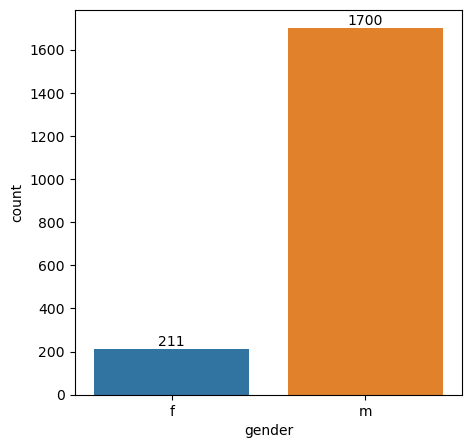

In [25]:
plt.figure(figsize=(5,5))
fig = sns.countplot(data=data, x="gender")
fig.bar_label(fig.containers[0])
plt.show()

### Education wise Issue Priority count

<Axes: xlabel='education'>

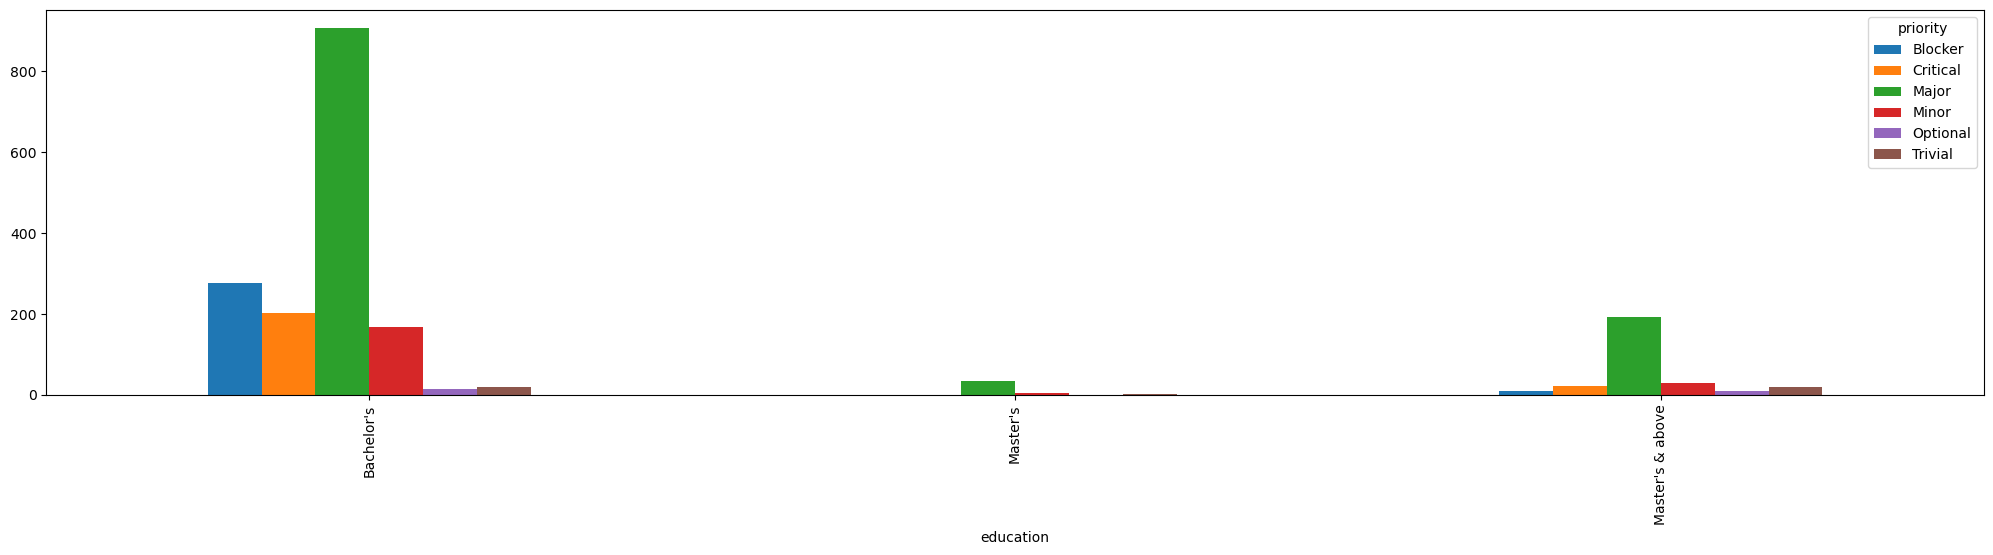

In [26]:
gb = data.groupby(['education','priority'])['id'].count()
fig = gb.unstack(-1)
fig.plot.bar(figsize=(25,5))

### Departmentwise Isssue Type count

<Axes: xlabel='department'>

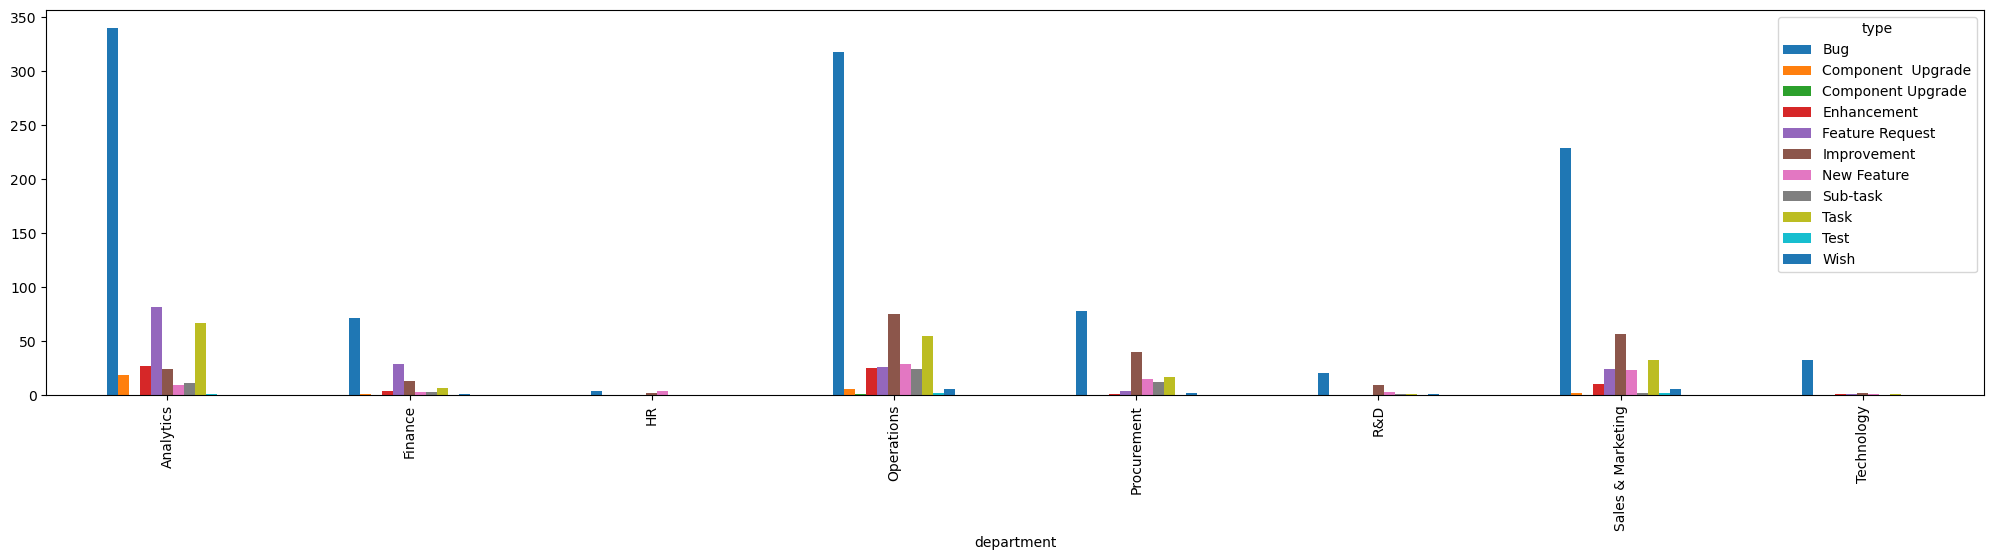

In [27]:
gb = data.groupby(['department','type'])['id'].count()
fig = gb.unstack(-1)
fig.plot.bar(figsize=(25,5))

### Priority wise issur count of the department

<Axes: xlabel='priority', ylabel='size'>

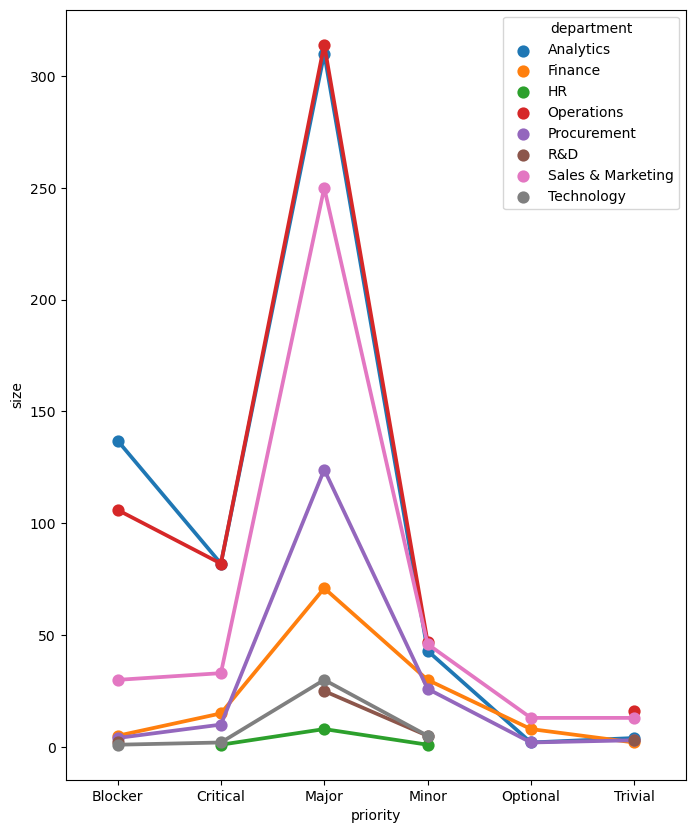

In [28]:
summary=data.groupby(['department','priority'], as_index=False).size()
plt.figure(figsize=(8,10))
sns.pointplot(x="priority", y="size", hue="department", data=summary)

### Region wise Issue count proportion

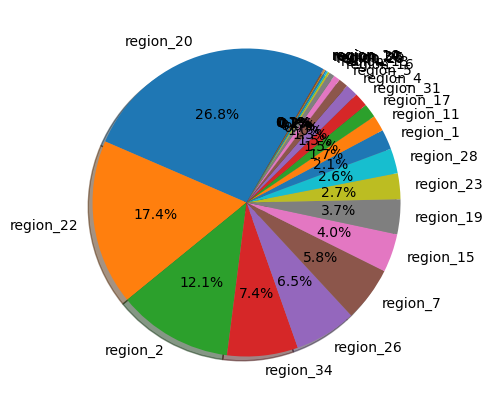

In [29]:
plt.figure(figsize=(25,5))
key = data['region'].value_counts().keys()
plt.pie(data['region'].value_counts(),startangle=60,labels=key,shadow=True,autopct='%1.1f%%')
plt.show()

### Issue count in Department by Year

<Axes: xlabel='created_year'>

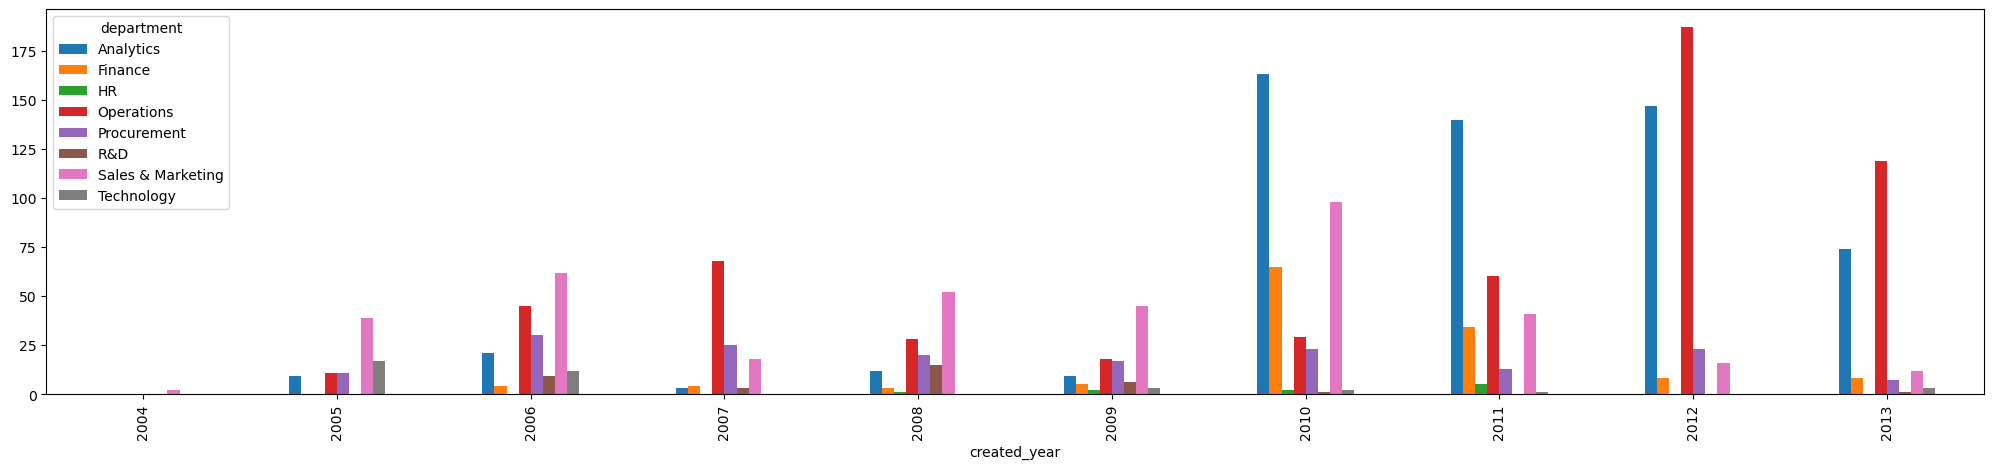

In [30]:
gb = data.groupby(['created_year','department'])['id'].count()
fig = gb.unstack(-1)
fig.plot.bar(figsize=(25,5))

### Education wise Issue count by Year

In [31]:
pivot = pd.crosstab(index=data['created_year'], columns=data['education'])

<Axes: xlabel='created_year'>

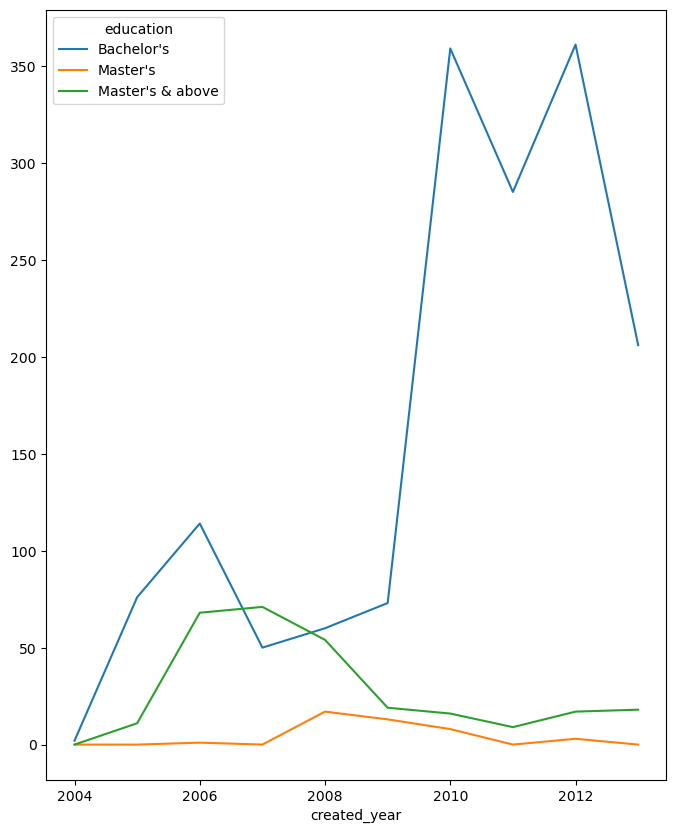

In [32]:
pivot.plot(kind='line', figsize=(8,10))

### Region wise Issue Assigned count to male and female

<Axes: xlabel='region'>

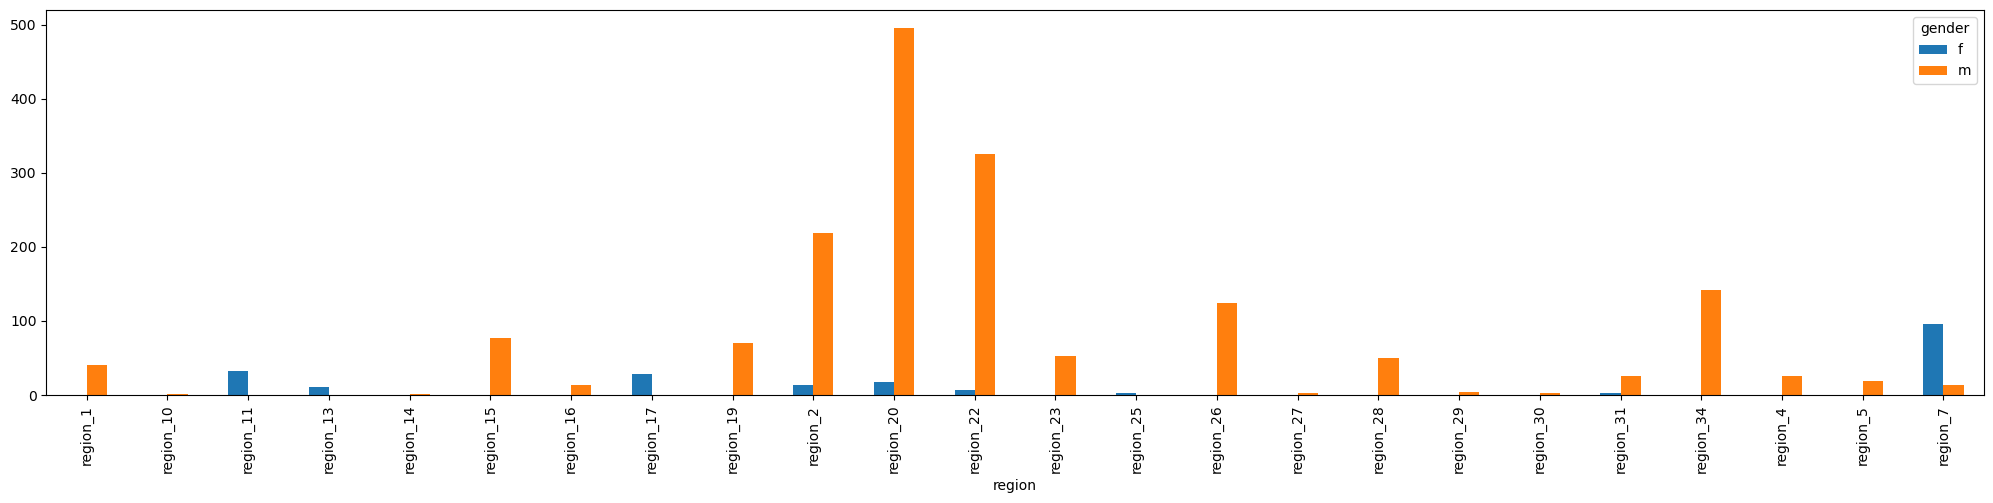

In [33]:
gb = data.groupby(['region','gender'])['id'].count()
fig = gb.unstack(-1)
fig.plot.bar(figsize=(25,5))

### ---------------------------------------------------   END   ----------------------------------------------------